# Creating a report from the Gapminder Dataset

The gapminder dataset is freely available data from statistics around the world, find out more here https://www.gapminder.org/

## Question

My idea is to discover which countries have population growth increment about
four times more than the original data (400%+),
comparing the first data observed in 1952 and the last data observed in 2007.

In [1]:
# first import the library pandas
import pandas

In [2]:
all_countries = pandas.read_csv('../data/gapminder_all.csv', index_col='country')

# Let's explore the dataset 

In [3]:
print("Columns:", all_countries.columns.format(), '\n')
print("Rows   :" , all_countries.index.format())

Columns: ['continent', 'gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962', 'gdpPercap_1967', 'gdpPercap_1972', 'gdpPercap_1977', 'gdpPercap_1982', 'gdpPercap_1987', 'gdpPercap_1992', 'gdpPercap_1997', 'gdpPercap_2002', 'gdpPercap_2007', 'lifeExp_1952', 'lifeExp_1957', 'lifeExp_1962', 'lifeExp_1967', 'lifeExp_1972', 'lifeExp_1977', 'lifeExp_1982', 'lifeExp_1987', 'lifeExp_1992', 'lifeExp_1997', 'lifeExp_2002', 'lifeExp_2007', 'pop_1952', 'pop_1957', 'pop_1962', 'pop_1967', 'pop_1972', 'pop_1977', 'pop_1982', 'pop_1987', 'pop_1992', 'pop_1997', 'pop_2002', 'pop_2007'] 

Rows   : ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo Dem. Rep.', 'Congo Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Moza

In [4]:
# select columns that contain pop
pop_bool = all_countries.columns.str.contains('pop')
pop_variables = all_countries.columns[pop_bool]
pop_variables

Index(['pop_1952', 'pop_1957', 'pop_1962', 'pop_1967', 'pop_1972', 'pop_1977',
       'pop_1982', 'pop_1987', 'pop_1992', 'pop_1997', 'pop_2002', 'pop_2007'],
      dtype='object')

In [5]:
countries_pop = all_countries[pop_variables]

In [6]:
countries_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, Algeria to New Zealand
Data columns (total 12 columns):
pop_1952    142 non-null float64
pop_1957    142 non-null float64
pop_1962    142 non-null float64
pop_1967    142 non-null float64
pop_1972    142 non-null float64
pop_1977    142 non-null float64
pop_1982    142 non-null float64
pop_1987    142 non-null float64
pop_1992    142 non-null float64
pop_1997    142 non-null float64
pop_2002    142 non-null int64
pop_2007    142 non-null int64
dtypes: float64(10), int64(2)
memory usage: 14.4+ KB


In [7]:
years = countries_pop.columns.str.strip('pop_')
years

Index(['1952', '1957', '1962', '1967', '1972', '1977', '1982', '1987', '1992',
       '1997', '2002', '2007'],
      dtype='object')

## Analysis

The analysis is based on subset of the data, hence reducing it is a good idea to
start with (select and filter). Then, a calculation between the 
two selected years is needed, for which making the data in wide format is useful. 
After that, producing the calculated increment percentange (could have been done
in one column). Lastly, arranging the output to have the countries with major increment 
at the top. Filtering towards the end can be conveniently modified. The last two 
lines; mutate country as factor (serves to keep the arrangement for the subsequent 
plot), and removing increment_pop (only to make the table include the necessary 
display columns).

Note, continent was kept as it will be plotted as category, and aids in the 
conclusion. Lastly, for the plot, one can ignore the columns year 1952 and 2007. 
However it is beneficial to have it displayed in the column for visual comparison
of population grow.

In [8]:
pop_increment = countries_pop.pop_2007 - countries_pop.pop_1952
increment_pop_percentage = ((pop_increment / countries_pop.pop_1952) * 100)
increment_pop_percentage.round(decimals=2).head(10)

country
Algeria                     259.21
Angola                      193.48
Benin                       364.72
Botswana                    270.59
Burkina Faso                220.50
Burundi                     243.08
Cameroon                    253.29
Central African Republic    238.24
Chad                        281.69
Comoros                     361.85
dtype: float64

## Results

The countries which have a population growth increment of about
four times (400%+) more than the original data, comparing 1952 and 2007.

In [9]:
countries_major_increment = countries_pop[increment_pop_percentage > 400]
countries_major_increment

,pop_1952,pop_1957,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
country,,,,,,,,,,,,
Cote d'Ivoire,2977019.0,3300000.0,3832408.0,4744870.0,6071696.0,7459574.0,9025951.0,10761098.0,12772596.0,14625967.0,16252726,18013409
Djibouti,63149.0,71851.0,89898.0,127617.0,178848.0,228694.0,305991.0,311025.0,384156.0,417908.0,447416,496374
Gambia,284320.0,323150.0,374020.0,439593.0,517101.0,608274.0,715523.0,848406.0,1025384.0,1235767.0,1457766,1688359
Kenya,6464046.0,7454779.0,8678557.0,10191512.0,12044785.0,14500404.0,17661452.0,21198082.0,25020539.0,28263827.0,31386842,35610177
Libya,1019729.0,1201578.0,1441863.0,1759224.0,2183877.0,2721783.0,3344074.0,3799845.0,4364501.0,4759670.0,5368585,6036914
Uganda,5824797.0,6675501.0,7688797.0,8900294.0,10190285.0,11457758.0,12939400.0,15283050.0,18252190.0,21210254.0,24739869,29170398
Bahrain,120447.0,138655.0,171863.0,202182.0,230800.0,297410.0,377967.0,454612.0,529491.0,598561.0,656397,708573
Iraq,5441766.0,6248643.0,7240260.0,8519282.0,10061506.0,11882916.0,14173318.0,16543189.0,17861905.0,20775703.0,24001816,27499638
Jordan,607914.0,746559.0,933559.0,1255058.0,1613551.0,1937652.0,2347031.0,2820042.0,3867409.0,4526235.0,5307470,6053193


Answering the question with a bar plot


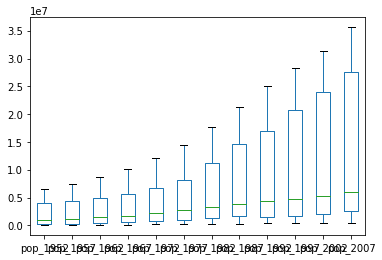

In [10]:
 %matplotlib inline
    
countries_major_increment.plot(kind='box')


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

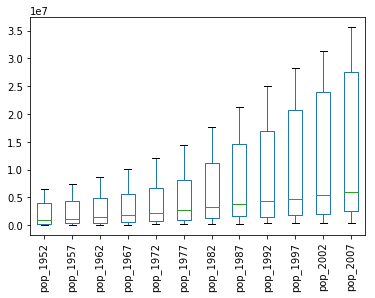

In [11]:
import matplotlib.pyplot as plt
countries_major_increment.plot(kind='box')
plt.xticks(rotation = 'vertical')

To make this plot nicer 

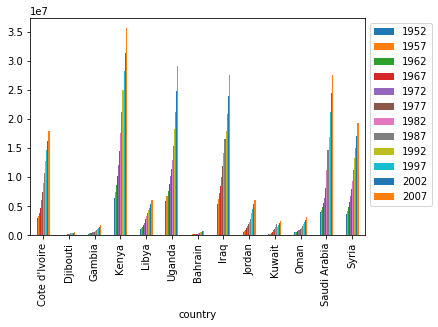

In [12]:
import matplotlib.pyplot as plt

p = countries_major_increment.plot(kind='bar')
p.legend(years, loc = 'best', bbox_to_anchor=(1,1))


In [13]:
major_increment = increment_pop_percentage[increment_pop_percentage > 400] 
major_increment


country
Cote d'Ivoire     505.082097
Djibouti          686.036200
Gambia            493.823509
Kenya             450.896095
Libya             492.011603
Uganda            400.796817
Bahrain           488.286134
Iraq              405.344000
Jordan            895.731798
Kuwait           1465.974375
Oman              531.092702
Saudi Arabia      589.048019
Syria             427.502076
dtype: float64

In [14]:
major_increment.sort_values()

country
Uganda            400.796817
Iraq              405.344000
Syria             427.502076
Kenya             450.896095
Bahrain           488.286134
Libya             492.011603
Gambia            493.823509
Cote d'Ivoire     505.082097
Oman              531.092702
Saudi Arabia      589.048019
Djibouti          686.036200
Jordan            895.731798
Kuwait           1465.974375
dtype: float64

Text(0,0.5,'Percentage growth (%)')

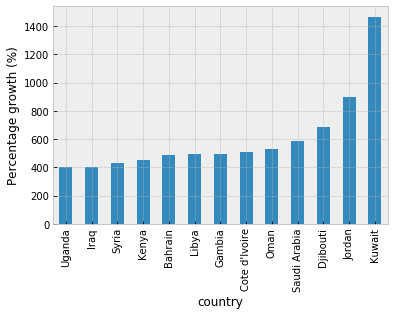

In [15]:
plt.style.use('bmh')
p = major_increment.sort_values().plot('bar')
plt.xticks(rotation = 'vertical')
plt.ylabel('Percentage growth (%)')

In [18]:
# plt.style.available

## Conclusion

From the data analysed 13 countries had 
incremented their population by 4 times,
comparing the observationa from 1952 and 2007.
These countries represent Asian and African 
countries.

The second plot clearly displays Kuwait as the country
with major population increment, also detailed in Table 1, from having
`160000` people in 1952 then reaching `2505559` in 5.5 decades (2007) is 
almost a 15 times population increment since 1952. 

It is important to notice some facts putting in context our analysis. First of 
all, the information shown here is solely dependent on the data and its accuracy.
After double checking external data, Kuwait seems to be receiving many expats 
which contributes to its population growth, so not only more births but external
inflow of people. 
Another comparison to explore with the aid of external data is to see how the growth 
continued after 2007 
[[1](https://en.wikipedia.org/wiki/List_of_countries_by_population_growth_rate)].
In respect to the external table, we can notice other facts, not only that 
population growth varied over the last ten years, in relation to the present 
analysis. Also, that some countries were not included in the original dataset, 
such as Qatar, South Sudan and United Arab Emirates. Hence our analysis is 
limited to our original observations.